## **Project**: Estimate Pi

The goal of this project is to estimate the Pi, the famous circle number approximately given by 3.1415..., using a Monte Carlo Simulation approach.

Monte Carlo Simulation is a mathematical technique, which is used to estimate the possible outcomes of an uncertain event. These methods rely on sampling of random numbers. Here, we replicate the famous *dart method* used to approximate the value of Pi.



In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

The steps to perform the Monte Carlo Simulation dart method are the following:
* Create a unit circle and draw it inside a square.
* The darts must follow a uniform distribution. This means that the probability of a dart touching anywhere on the board is exactly the same.
* Using the circle´s formula if the sum of the distances from the center is less than the radius squared then it means that the dart is inside the circle. Otherwise, the dart is located outside the circle.
* Finally, we estimate Pi. Pi is approximately equal to the proportion of darts inside the circle multiplied by 4.

In [25]:
class EstimatePi(object):
    def __init__(self):
        # First, we need to create the unit square and circle of radius 1/2 inside
        self.fig, self.ax = plt.subplots(figsize = (10,10)) #create axis and figure objects
        self.ax.set(xlim = (0,1), ylim= (0,1)) #create unit square
        self.ax.add_patch(mpl.patches.Circle((0.5,0.5), radius= 0.5, fill= False, edgecolor= 'black', linewidth = 2)) #add circle to the axis

    def simulate_darts(self, N):
        # we need to create an array with random uniform numbers for x and y coordinates
        x = np.random.uniform(0,1,N)
        y = np.random.uniform(0,1,N)
        #create category 'cat' list
        cat = []
        for i in range(N):
            # using the circle's formula, if the sum of the distances from center is less than radius^2 then its inside the circle
            cond = (0.5-x[i])**2 + (0.5-y[i])**2
            if cond <= 0.25:
                cat.append(1)
            else:
                cat.append(0)
        df = pd.DataFrame(dict(x = x, y = y, cat = cat))
        groups = df.groupby('cat')
        for name, group in groups:
            self.ax.scatter(group['x'], group['y'], s=3) #make scatterplot of darts grouped by category
        # pi is approximately equal to the proportion of darts inside the circle times 4
        ratio = len(df[df['cat'] == 1])/len(x)*4
        print('The estimated value for pi is: ', ratio)
        return plt.show()



The estimated value for pi is:  3.1216


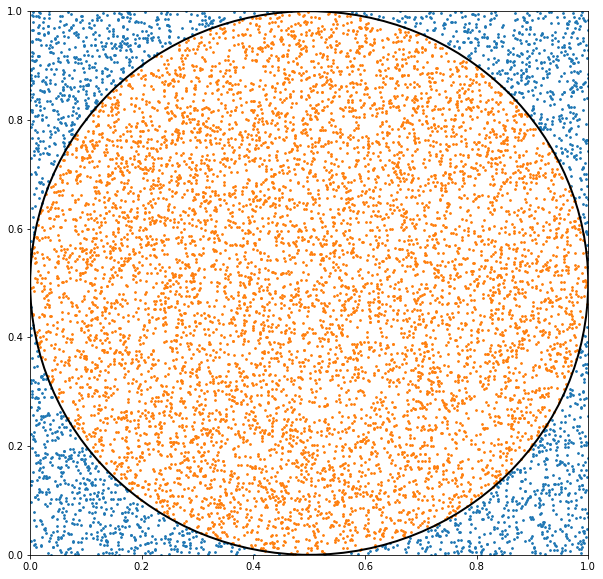

In [30]:
a = EstimatePi()
a.simulate_darts(10000)


As the number of darts thrown increases, the approximation of the method is more accurate. ![100 darts](estimate_pi_1.PNG "100 darts").

![1000](estimate_pi_2.PNG "1,000 darts").

![1000000 darts](estimate_pi_3.PNG "10,000,000 darts")